In [40]:
import collections
import glob
import json
import os
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

from sys_config import EXP_DIR
# %matplotlib inline
# %matplotlib notebook
%matplotlib widget

import hiplot as hip
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

sns.set_style("white")
sns.set_context("notebook")
plt.rcParams['font.family'] = "serif"



# Configuration

In [41]:
pair = "deen"
experiments = glob.glob(EXP_DIR + f"/experiments/sensitivity/trans.{pair}_*/**")

# Load the experiment logs

In [42]:
def flatten(d, parent_key='', sep='.'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

results = []
for exp in sorted(experiments):
    name = exp.split(os.sep)[-2]
    try:
        log = flatten(json.load(open(os.path.join(exp, f"{name}.json"))))
        
        with open(os.path.join(exp, f"BLEU.json")) as json_file:
            data = json_file.read()
            data = data[:data.rfind("}")+1]
            bleu = flatten(json.loads(data), "bleu")
        results.append({**log, **bleu})
    except Exception as e:
        print(f"Failed to load {name}!", e)

Failed to load trans.deen_prior_w=1_tau=1_obj=rkl_nhid=2048! [Errno 2] No such file or directory: '/home/christos/PycharmProjects/seq3mt/experiments/experiments/sensitivity/trans.deen_prior_w=1_tau=1_obj=rkl_nhid=2048/20-03-18_14:37:53_20746364/trans.deen_prior_w=1_tau=1_obj=rkl_nhid=2048.json'


In [43]:
df = pd.DataFrame.from_records(results)
df.head()

bleu.test.1  bleu.test.5  bleu.val.1  bleu.val.5  config.batch_tokens  \
0         27.0         28.1        22.4        23.2                10000   
1         25.7         26.9        21.6        22.4                10000   
2         26.0         27.5        21.7        22.5                10000   
3         27.7         29.1        23.1        24.2                10000   
4         27.7         29.0        23.0        24.2                10000   

                                       config.config  config.cores  \
0  ../../configs/transformer/trans.deen_prior...             4   
1  ../../configs/transformer/trans.deen_prior...             4   
2  ../../configs/transformer/trans.deen_prior...             4   
3  ../../configs/transformer/trans.deen_prior...             4   
4  ../../configs/transformer/trans.deen_prior...             4   

   config.data.lowercase                             config.data.prior_path  \
0                   True  ../checkpoints/prior.lm_news_en_30M_trans_b...   
1                   True  ../checkpoints/prior.lm_news_en_30M_trans_b...   
2                   True  ../checkpoints/prior.lm_news_en_30M_trans_b...   
3                   True  ../checkpoints/prior.lm_news_en_30M_trans_b...   
4                   True  /rds/project/t2_vol4/rds-t2-cs055/cbaziotis/wo...   

   config.data.seq_len  ...  \
0                 1000  ...   
1                 1000  ...   
2                 1000  ...   
3                 1000  ...   
4                 1000  ...   

                    metrics.epoch_loss.TRAIN - PRIOR  \
0  [3.4696256502551877, 2.2269925624561586, 2.372...   
1  [3.4675085078742387, 2.2272813252786725, 2.372...   
2  [3.466175220004415, 2.234974420675632, 2.38998...   
3  [3.4832817348348306, 2.224488838674012, 2.2521...   
4  [3.4670038829275787, 2.235023815051632, 2.2713...   

                       metrics.epoch_loss.VALID - MT  \
0  [6.216254817114936, 5.039231326844957, 4.08849...   
1  [6.293187512291802, 5.032520585589939, 4.04377...   
2  [6.229096598095364, 4.973389758004083, 4.07603...   
3  [5.400637944539388, 4.409358554416233, 3.66663...   
4  [5.401500384012858, 4.4260968764623, 3.6691119...   

                    metrics.epoch_loss.VALID - PRIOR  \
0  [2.97671647866567, 2.687761002116733, 3.034105...   
1  [3.0372942950990467, 2.6657609144846597, 2.978...   
2  [2.9923509889178805, 2.70057311322954, 3.07831...   
3  [2.94166726536221, 2.645460195011563, 2.775721...   
4  [2.967877838346693, 2.6884780857298107, 2.8114...   

                        metrics.epoch_ppl.TRAIN - MT  \
0  [1002.3967209392745, 143.43155086710334, 37.45...   
1  [1005.8263006558086, 147.00309945459432, 37.06...   
2  [1001.7585543067382, 141.1082826560685, 36.345...   
3  [406.83173048285965, 78.2248889985043, 26.0069...   
4  [400.36174912946376, 78.40269620883103, 25.470...   

                        metrics.epoch_ppl.VALID - MT  \
0  [500.82403763925345, 154.35132369534531, 59.64...   
1  [540.8746288229027, 153.3189796706904, 57.0415...   
2  [507.29698336104474, 144.51593206849833, 58.91...   
3  [221.54770628121474, 82.2167090415254, 39.1200...   
4  [221.7388601858566, 83.6044607116721, 39.21706...   

                                     metrics.loss.MT  \
0  [9.101292648315429, 8.81435094833374, 8.502405...   
1  [9.07296516418457, 8.788686981201172, 8.458514...   
2  [9.066102695465087, 8.79771598815918, 8.463093...   
3  [7.825761232376099, 7.564507427215577, 7.27760...   
4  [7.820094575881958, 7.559331455230713, 7.26712...   

                                  metrics.loss.PRIOR  \
0  [5.509432201385498, 5.21135591506958, 4.943475...   
1  [5.470586156845092, 5.205886564254761, 4.87726...   
2  [5.498539419174194, 5.251172103881836, 4.89333...   
3  [5.4532372188568115, 5.178426904678345, 4.8750...   
4  [5.468168115615844, 5.171791782379151, 4.85710...   

                                          metrics.lr  \
0  [6.176323555016366e-08, 3.149925013058347e-06,...   
1  [6.176323555016366e-0

In [44]:
# rename the columns of interest
rename_map={
    "config.model.nhid": "ff_dim", 
    'config.losses.prior.tau': "tau", 
    'config.losses.prior.weight': "lambda", 
    'config.losses.prior.objective': "objective",
    'config.losses.mt.smoothing': "smoothing"
}
df = df.rename(columns=rename_map)


# drop the rest
keep = [k for k in df.columns if k in rename_map.values() or k.startswith("bleu")]
df = df[keep]

# add dummy categorical column
def column_formatter(clm):
    mapping = {c:i for c, i in zip(set(df[clm]), range(len(set(df[clm]))))}
    def _replace(value):
        return mapping[value]
    return _replace, mapping

obj_formatter, obj_mapping = column_formatter("objective")
df["objective_cat"] = df.replace({"objective": obj_mapping})["objective"]

df.head()

bleu.test.1  bleu.test.5  bleu.val.1  bleu.val.5  smoothing objective  tau  \
0         27.0         28.1        22.4        23.2        0.0        kl    1   
1         25.7         26.9        21.6        22.4        0.0        kl    1   
2         26.0         27.5        21.7        22.5        0.0        kl    1   
3         27.7         29.1        23.1        24.2        0.1        kl    1   
4         27.7         29.0        23.0        24.2        0.1        kl    1   

   lambda  ff_dim  objective_cat  
0    0.02    1024              1  
1    0.02    1024              1  
2    0.02    1024              1  
3    0.02    1024              1  
4    0.02    1024              1

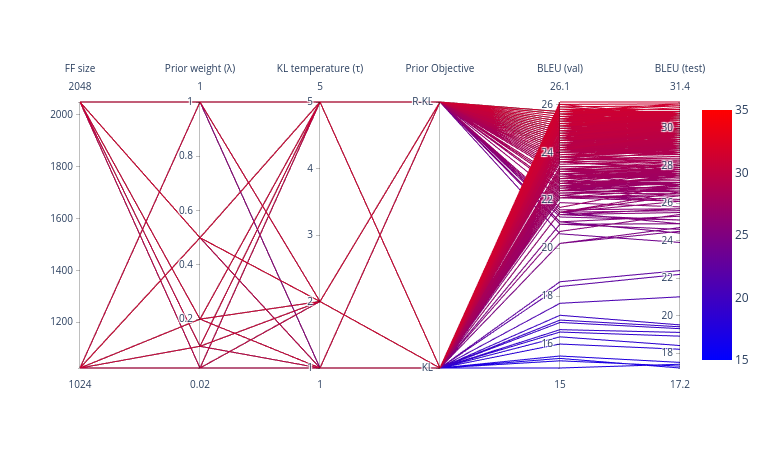

In [45]:
import plotly.offline as pyo
import plotly.graph_objects as go
pyo.init_notebook_mode()

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['bleu.test.5'],
                   colorscale = 'Bluered',
#                    colorscale = 'Cividis_r',
#                    colorscale = 'OrRd',
                   showscale = True,
                   cmin = 15,
                   cmax = 35),
        dimensions = list([
            
            dict(label = 'FF size', values = df['ff_dim']),
            
            dict(label = "Prior weight (λ)", values = df['lambda']),
            
            dict(label = 'KL temperature (τ)', values = df['tau']),
            
            dict(tickvals = [0,1],
                 ticktext = ['KL','R-KL'],
                 label = 'Prior Objective', values = df['objective_cat']),
            
            dict(
#                 range = [15,35],
                 label = "BLEU (val)", values = df['bleu.val.5']),
            
            dict(
#                 range = [15,35],
                 label = "BLEU (test)", values = df['bleu.test.5']),
        ])
    )
)
fig.show()
fig.write_image("./figures/parallel_plot.svg")
fig.write_image("./figures/parallel_plot.pdf")
fig.write_image("./figures/parallel_plot.png")


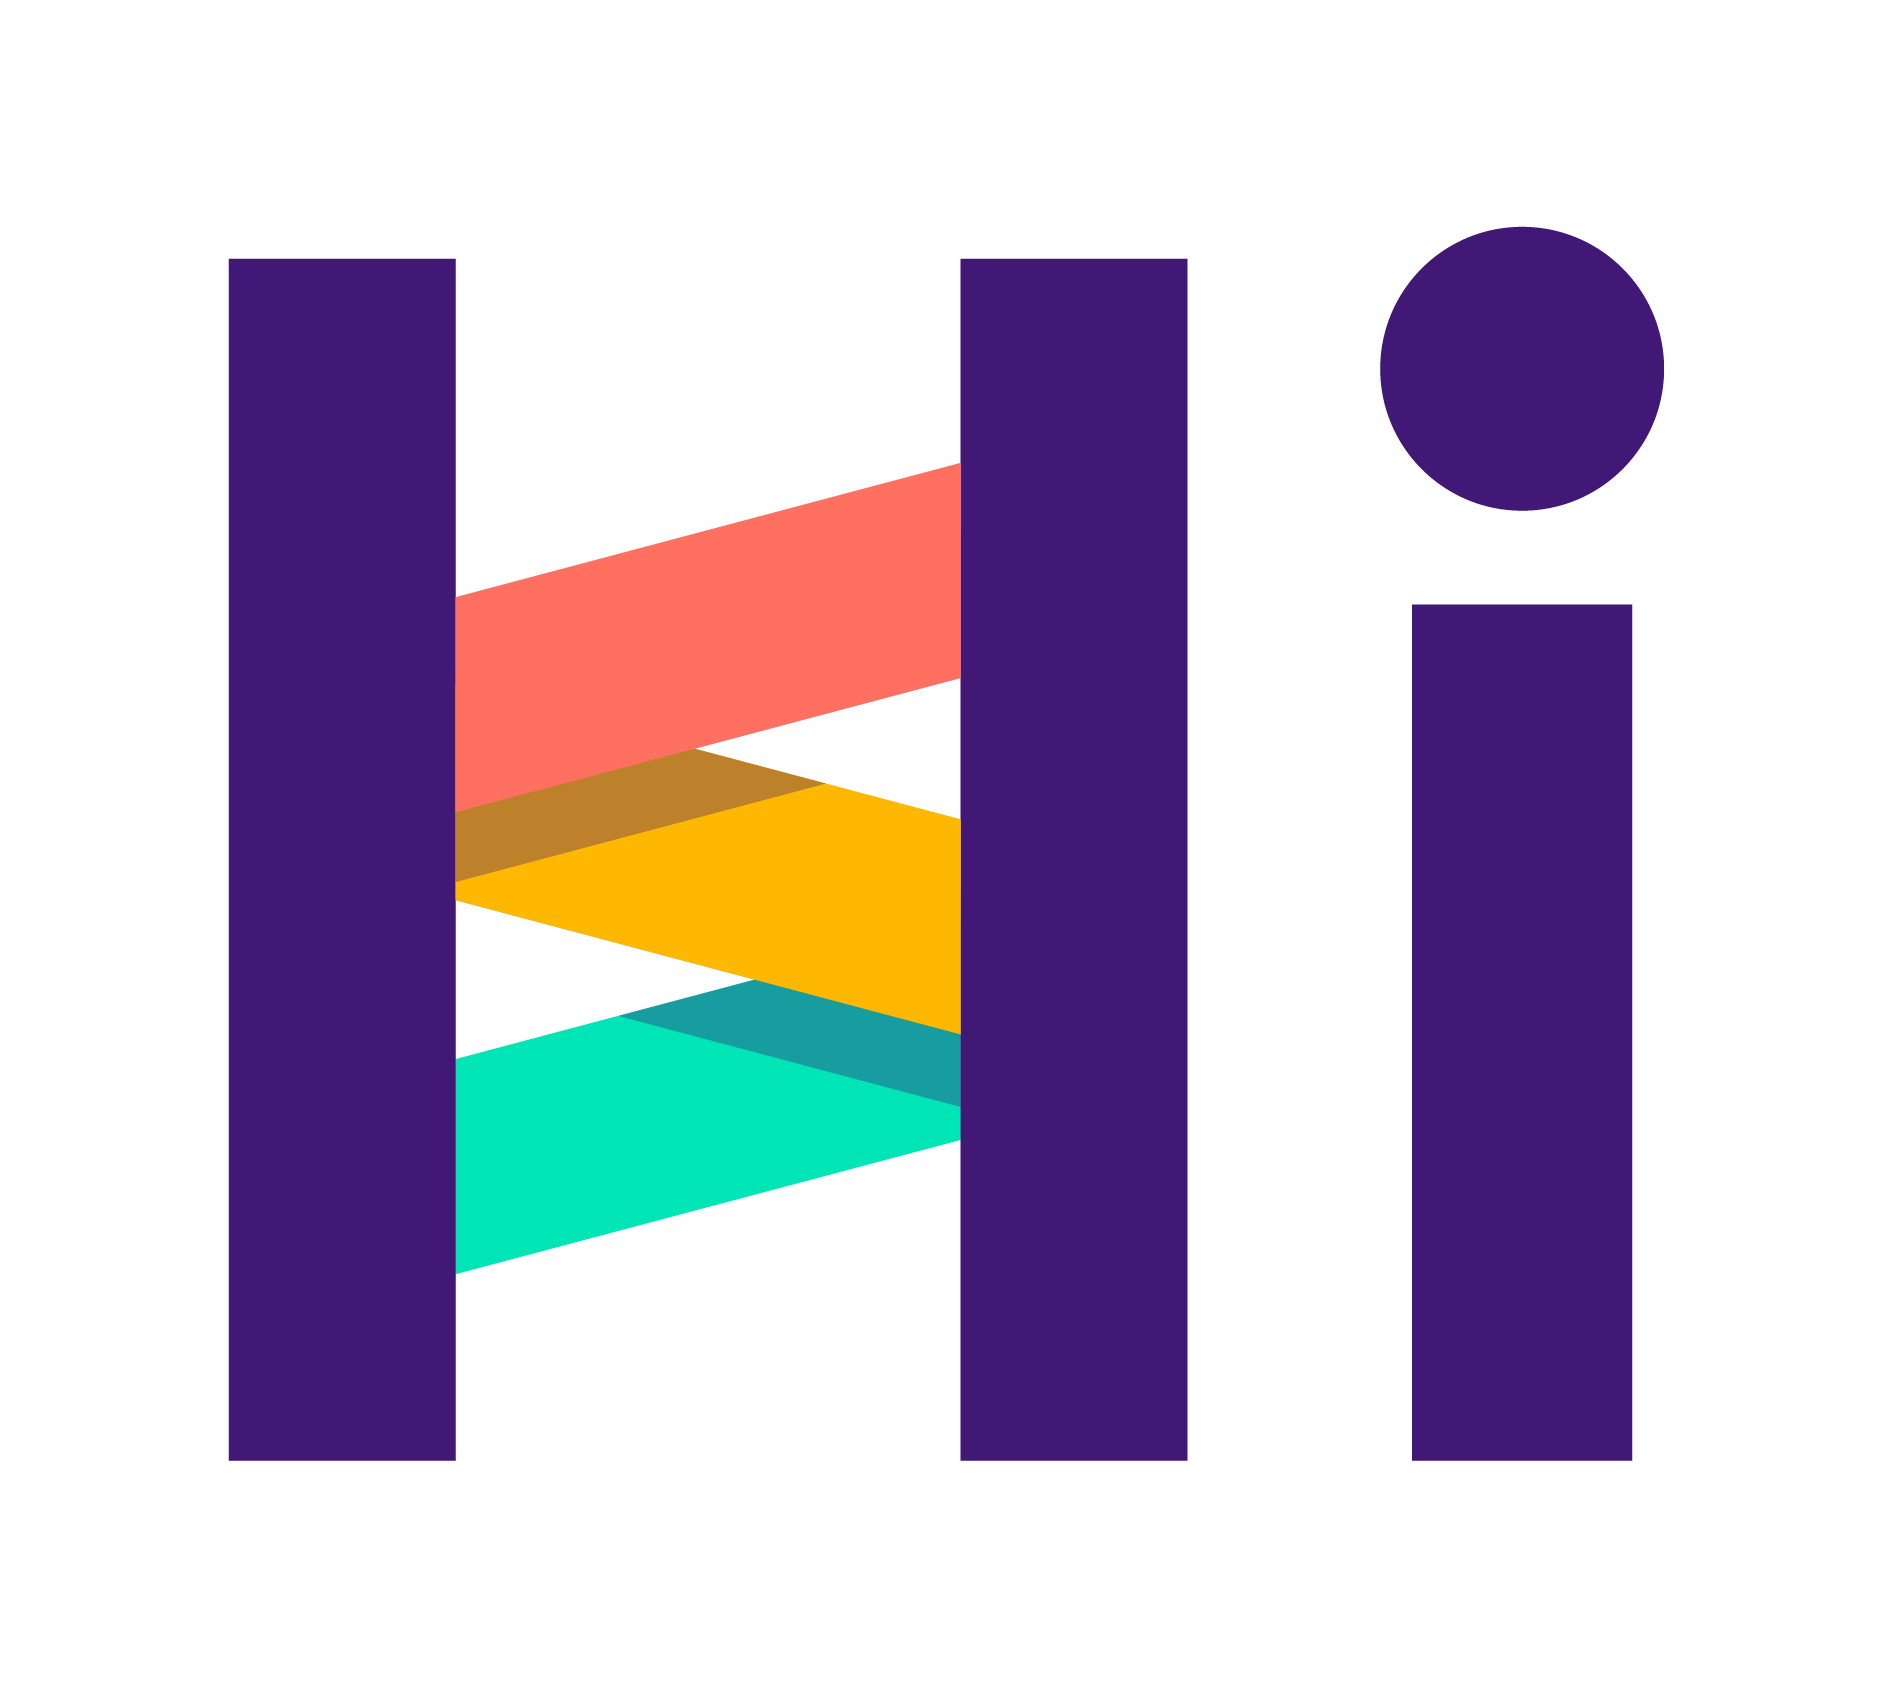

<IPython.core.display.Javascript object>

In [46]:
# data = df.drop(['bleu.test.1', 'bleu.test.10','bleu.val.1', 'bleu.val.10', 'objective_cat'], axis = 1).to_dict(orient='records')
data = df.drop(['bleu.test.1', 'bleu.val.1',  'objective_cat'], axis = 1).to_dict(orient='records')
hip.Experiment.from_iterable(data).display()

# Pairwise comparisson between KL weight and temperature

In [47]:
def compare_std(c1,c2,metric, data, xlabel=None, ylabel=None, title=None):
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    grouped = data.groupby([c1, c2], as_index=False).mean()
    grouped[f"{metric}_std"] = data.groupby([c1, c2], as_index=False).std()[metric]
    sns.heatmap(grouped.pivot(index=c1, columns=c2, values=metric), 
                annot=True, 
                robust=True, 
#                 square=True, 
                cmap="Reds", 
#                 cmap="YlGnBu",
#                 cmap="BuPu",
                cbar=False,
                fmt=".1f",
                cbar_kws={'label': 'BLEU (mean)', 'orientation': 'vertical'},
               ax=ax[0])
    sns.heatmap(grouped.pivot(index=c1, columns=c2, values=f"{metric}_std"), 
                annot=True, 
#                 square=True, 
                cmap="Reds", fmt=".2f",
                vmin=0, vmax=1,
                cbar_kws={'label': 'BLEU (std)', 'orientation': 'vertical'},
               ax=ax[1])
    
    ax[0].invert_yaxis()
    ax[1].invert_yaxis()
    
    if xlabel is not None:
        ax[0].set_xlabel(xlabel)
        ax[1].set_xlabel(xlabel)
    if ylabel is not None:
        ax[0].set_ylabel(ylabel)
        ax[1].set_ylabel(ylabel)
    
    plt.tight_layout()
    
    if title is not None:
        st = plt.suptitle(title)
        st.set_y(0.95)
        fig.subplots_adjust(top=0.85)
    
    plt.show()
    fig.savefig(f'./figures/comp_{metric}_{c1}-{c2}_mean_std.png', bbox_inches = 'tight', pad_inches = .02)
    fig.savefig(f'./figures/comp_{metric}_{c1}-{c2}_mean_std.pdf', bbox_inches = 'tight', pad_inches = .02)

In [76]:
plt.style.use('classic')
from matplotlib import rc

font_size = 11
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": font_size,
        "font.weight": "bold",
        "axes.labelweight": "bold",
        "font.size": font_size,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": font_size,
        "xtick.labelsize": font_size,
        "ytick.labelsize": font_size,
}
rc('text', usetex=True)
sns.set_style("white", {
    "font.family": "serif",
    "font.serif": ["CMU Serif", "Times", "serif"],
})
plt.rcParams.update(nice_fonts)


def compare(c1,c2,metric, data, xlabel=None, ylabel=None, title=None, agg="mean", cmap="Reds", cbar=True):
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    if agg == "mean":
        grouped = data.groupby([c1, c2], as_index=False).mean()
    elif agg == "std":
        grouped = data.groupby([c1, c2], as_index=False).std()[metric]
    else:
        raise NotImplemented
        
    sns.heatmap(grouped.pivot(index=c1, columns=c2, values=metric), 
                annot=True, 
                robust=True, 
                cmap=cmap, 
                cbar=cbar,
                fmt=".1f", 
#                 linewidths=.1,
                cbar_kws={'label': 'BLEU', 'orientation': 'vertical'},
               ax=ax)
    
    ax.invert_yaxis()
    
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    
    plt.tight_layout()
    
    if title is not None:
        st = plt.suptitle(title)
        st.set_y(0.95)
        fig.subplots_adjust(top=0.85)
    
    plt.show()
    fig.savefig(f'./figures/comp_{metric.split(".")[1]}_{c1}-{c2}_{agg}_cbar={cbar}.png', bbox_inches = 'tight', pad_inches = .02)
    fig.savefig(f'./figures/comp_{metric.split(".")[1]}_{c1}-{c2}_{agg}_cbar={cbar}.pdf', bbox_inches = 'tight', pad_inches = .02)

In [67]:
# drop specific rows
kl_tau = df[df['smoothing']==0.1]
kl_tau = kl_tau[kl_tau['ff_dim']==1024]
# df = df[df['lambda'] < 1]

# Forward-KL: $\tau$ vs. $\lambda$

In [77]:
compare('lambda', 'tau', 'bleu.test.5', kl_tau[kl_tau['objective']=='kl'], "KL temperature $(\\tau)$" ,"KL weight ($\\lambda$)", agg="mean", cbar=True)
compare('lambda', 'tau', 'bleu.val.5', kl_tau[kl_tau['objective']=='kl'], "KL temperature $(\\tau)$" ,"KL weight ($\\lambda$)", agg="mean", cbar=True)
compare('lambda', 'tau', 'bleu.test.5', kl_tau[kl_tau['objective']=='kl'], "KL temperature $(\\tau)$" ,"KL weight ($\\lambda$)", agg="mean", cbar=False)
compare('lambda', 'tau', 'bleu.val.5', kl_tau[kl_tau['objective']=='kl'], "KL temperature $(\\tau)$" ,"KL weight ($\\lambda$)", agg="mean", cbar=False)

compare_std('lambda', 'tau', 'bleu.test.5', kl_tau[kl_tau['objective']=='kl'], "temperature $(\\tau)$" ,"KL weight ($\\lambda$)", "Test set")
compare_std('lambda', 'tau', 'bleu.val.5', kl_tau[kl_tau['objective']=='kl'], "temperature $(\\tau)$" ,"KL weight ($\\lambda$)", "Validation set")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Reverse-KL: $\tau$ vs. $\lambda$

In [60]:
compare('lambda', 'tau', 'bleu.test.5', kl_tau[kl_tau['objective']=='rkl'], "temperature $(\\tau)$" ,"KL weight ($\\lambda$)", "Test set")
compare('lambda', 'tau', 'bleu.val.5', kl_tau[kl_tau['objective']=='rkl'], "temperature $(\\tau)$" ,"KL weight ($\\lambda$)", "Validation set")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [61]:
kl = df[df['objective']=='kl'].groupby(['lambda', 'tau'], as_index=False).mean().pivot(index='lambda', columns='tau', values='bleu.test.5')
rkl = df[df['objective']=='rkl'].groupby(['lambda', 'tau'], as_index=False).mean().pivot(index='lambda', columns='tau', values='bleu.test.5')

def get_surface(data):
    _x, _y = np.meshgrid(data.axes[1].to_numpy(),
                         data.axes[0].to_numpy() )
    _z = data.to_numpy()
    return _x, _y, _z

fig = plt.figure(figsize=(11, 7))
ax = plt.axes(projection='3d')
ax.cla()
s_kl = get_surface(kl)
s_rkl = get_surface(rkl)

s1 = ax.plot_surface(s_kl[0], s_kl[1], s_kl[2],  alpha = 0.6, shade=True,linewidth=0.9, antialiased=True, zorder = 0.3, label="KL")
s1._facecolors2d=s1._facecolors3d
s1._edgecolors2d=s1._edgecolors3d

s2 = ax.plot_surface(s_rkl[0], s_rkl[1], s_rkl[2], alpha = 0.6, shade=True,linewidth=0.9, antialiased=True, zorder = 0.8, label="R-KL")
s2._facecolors2d=s2._facecolors3d
s2._edgecolors2d=s2._edgecolors3d

ax.set_xlabel('$\\tau$')
ax.set_ylabel('$\\lambda$')
ax.set_zlabel('BLEU')
ax.legend()
ax.view_init(30, 120)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [62]:
kl = df[df['objective']=='kl'].groupby(['lambda', 'tau'], as_index=False).mean()
rkl = df[df['objective']=='rkl'].groupby(['lambda', 'tau'], as_index=False).mean()
_metric = 'bleu.test.5'

def get_bars(data, metric):
    x = data['lambda'].values
    y = data['tau'].values
    z = data[metric].values
    return x, y, z

bar_kl = get_bars(kl, _metric)
bar_rkl = get_bars(rkl, _metric)

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_trisurf(bar_kl[0], bar_kl[1], bar_kl[2], color='red', alpha=0.6,linewidth=0, antialiased=True)
ax1.plot_trisurf(bar_rkl[0], bar_rkl[1], bar_rkl[2], color='blue', alpha=0.6,linewidth=0, antialiased=True)

ax1.set_xlabel('$\\lambda$')
ax1.set_ylabel('$\\tau$')
ax1.set_zlabel('BLEU')
# ax1.set_zlim(25, 30)
ax.view_init(30, 120)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [63]:
kl = df[df['objective']=='kl'].groupby(['lambda', 'tau'], as_index=False).mean()
rkl = df[df['objective']=='rkl'].groupby(['lambda', 'tau'], as_index=False).mean()

_metric = 'bleu.test.5'
low = int(min(kl[_metric].values.min(), rkl[_metric].values.min())) - 1 
high =  int(max(kl[_metric].values.max(), rkl[_metric].values.max()))+1


def get_bars(data, metric):
    x = data['lambda'].values
    y = data['tau'].values
    dz = data[metric].values
    dz -= low
    z = np.zeros(len(x)) + low
    dx = np.ones(len(x)) * 0.01
    dy = np.ones(len(x)) * 0.2
    return x, y, z, dx, dy, dz, low, high

bar_kl = get_bars(kl, _metric)
bar_rkl = get_bars(rkl, _metric)

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(bar_kl[0], bar_kl[1], bar_kl[2], bar_kl[3], bar_kl[4], bar_kl[5], color='red', alpha=0.4,linewidth=0, antialiased=True)
ax1.bar3d(bar_rkl[0], bar_rkl[1], bar_rkl[2], bar_rkl[3], bar_rkl[4], bar_rkl[5], color='blue', alpha=0.4,linewidth=0, antialiased=True)

ax1.set_xlabel('$\\lambda$')
ax1.set_ylabel('$\\tau$')
ax1.set_zlabel('BLEU')
ax1.set_zlim(low, high)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(17, 31)

In [64]:
# sns.lmplot(x="tau", y="bleu.test.5", data=df, hue="ff_dim", col="objective", order=2)
sns.lmplot(x="tau", y="bleu.test.5", data=df, col="objective", order=2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [65]:
# sns.lmplot(x="lambda", y="bleu.test.5", data=df, hue="ff_dim", col="objective", order=2)
sns.lmplot(x="lambda", y="bleu.test.5", data=df, col="objective", order=2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …